# Proyecto de modelo predictivo para la empresa OilyGiant 

## Introducción

OilyGiant, una empresa petrolífera esta buscando la mejor región para abrir sus nuevos pozos de extracción de petróleo, para esto esta buscando un modelo predictivo que les indique cual es la región con un beneficio mayor y un porcentaje de perdida mínimo. Para esto tenemos los datos de tres diferentes regiones, donde está el volumen de reservas por pozo y características relevantes para el modelo predictivo.

### Objetivos

1. Recolección de los parametros y objetivos de las diferentes regiones.
2. Construcción del modelo para predecir el volumen de reservas de petróleo en los nuevos pozos.
3. Selección de la región con los pozos con los valores estimados más altos.
4. Selección de la región con mayor beneficio y menor porcentaje de perdida.

## Importación de las Librerías

In [29]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

## Lectura y visualización de los Datasets

In [2]:
geo_df_1 = pd.read_csv('/datasets/geo_data_0.csv')
geo_df_2 = pd.read_csv('/datasets/geo_data_1.csv')
geo_df_3 = pd.read_csv('/datasets/geo_data_2.csv')

print('\nDataset Región 1')
display(geo_df_1.sample(5))
print(geo_df_1.info())
print('\nDataset Región 2')
display(geo_df_2.sample(5))
print(geo_df_2.info())
print('\nDataset Región 3')
display(geo_df_3.sample(5))
print(geo_df_3.info())




Dataset Región 1


,id,f0,f1,f2,product
21439,idHAJ,-0.634313,0.880227,1.381367,120.306615
44503,ss7p7,0.026471,0.504907,7.120899,161.396967
58968,9wRLo,0.308033,0.859482,-0.740016,130.422551
22011,Gd8MX,-0.754177,0.513515,2.468752,90.042096
72772,Tp6Lg,0.663726,-0.345597,0.870604,137.059639


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

Dataset Región 2


,id,f0,f1,f2,product
28337,SAre6,8.654045,-6.639621,5.003283,134.766305
65161,Y5kc5,-3.865472,-0.464253,5.000527,137.945408
65560,g9zHd,6.007931,-4.150667,4.012197,107.813044
276,Q3qKs,3.088185,-12.402248,3.004042,84.038886
96465,CIQUB,2.422227,-4.044062,-0.003719,0.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

Dataset Región 3


,id,f0,f1,f2,product
44838,Zl20b,-0.801150,0.498775,3.590000,141.669644
17217,Cbj0m,0.666576,0.468253,3.647710,53.525970
74528,2hgts,1.584235,-0.370150,1.648771,159.197112
66362,NgQfR,0.951005,-1.586403,1.213276,30.641548
57657,rSKlP,0.070114,0.936759,0.474022,98.285609


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


In [3]:
print('Duplicados en el dataset de la región uno:', geo_df_1.duplicated().sum())
print('Duplicados en el dataset de la región dos:', geo_df_2.duplicated().sum())
print('Duplicados en el dataset de la región tres:', geo_df_3.duplicated().sum())

Duplicados en el dataset de la región uno: 0
Duplicados en el dataset de la región dos: 0
Duplicados en el dataset de la región tres: 0


* Se observa que los datos estan en buena condición, sin valores nulos o valores duplicados. 

## Modelos de predicción para las diferentes regiones

### Preprocesamiento de datos para el modelo de predicción de la región 1

In [4]:
# División de datos entre target y features
target = geo_df_1['product']
features = geo_df_1.drop(['product', 'id'], axis=1)

# División de dataset entre entrenamiento y validación
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)

# Standarización de datos
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_valid = scaler.transform(features_valid)

features_train.shape, features_valid.shape, target_train.shape, target_valid.shape

((75000, 3), (25000, 3), (75000,), (25000,))

### Entrenamiento y resultados del modelo

In [5]:
model = LinearRegression()
model.fit(features_train, target_train) 
predictions_valid = model.predict(features_valid)

result = mean_squared_error(target_valid, predictions_valid)**0.5
print(f'\nRECM del modelo de regresión lineal en el conjunto de validación: {result:.4f}')

result_r2 = r2_score(target_valid, predictions_valid)
print(f'R2 del modelo de regresión lineal en el conjunto de validación: {result_r2:.4f}')

predictions_valid_mean_1 = predictions_valid.mean()
print(f'\nVolumen medio previsto (miles de barriles): {predictions_valid_mean_1:.4f}')


RECM del modelo de regresión lineal en el conjunto de validación: 37.5794
R2 del modelo de regresión lineal en el conjunto de validación: 0.2799

Volumen medio previsto (miles de barriles): 92.5926


### Preprocesamiento de datos para el modelo de predicción de la región 2

In [6]:
target2 = geo_df_2['product']
features2 = geo_df_2.drop(['product', 'id'], axis=1)

features_train2, features_valid2, target_train2, target_valid2 = train_test_split(
    features2, target2, test_size=0.25, random_state=12345)

scaler = StandardScaler()
features_train2 = scaler.fit_transform(features_train2)
features_valid2 = scaler.transform(features_valid2)

features_train2.shape, features_valid2.shape, target_train2.shape, target_valid2.shape

((75000, 3), (25000, 3), (75000,), (25000,))

### Entrenamiento y resultados del modelo

In [7]:
model2 = LinearRegression()
model2.fit(features_train2, target_train2) 
predictions_valid2 = model2.predict(features_valid2)

result2 = mean_squared_error(target_valid2, predictions_valid2)**0.5
print(f'\nRECM del modelo de regresión lineal en el conjunto de validación: {result2:.4f}')

result_r2_2 = r2_score(target_valid2, predictions_valid2)
print(f'R2 del modelo de regresión lineal en el conjunto de validación: {result_r2_2:.4f}')

predictions_valid_mean_2 = predictions_valid2.mean()
print(f'\nVolumen medio previsto (miles de barriles): {predictions_valid_mean_2:.4f}')


RECM del modelo de regresión lineal en el conjunto de validación: 0.8931
R2 del modelo de regresión lineal en el conjunto de validación: 0.9996

Volumen medio previsto (miles de barriles): 68.7285


### Preprocesamiento de datos para el modelo de predicción de la región 3

In [8]:
target3 = geo_df_3['product']
features3 = geo_df_3.drop(['product', 'id'], axis=1)

features_train3, features_valid3, target_train3, target_valid3 = train_test_split(
    features3, target3, test_size=0.25, random_state=12345)

scaler = StandardScaler()
features_train3 = scaler.fit_transform(features_train3)
features_valid3 = scaler.transform(features_valid3)

features_train3.shape, features_valid3.shape, target_train3.shape, target_valid3.shape

((75000, 3), (25000, 3), (75000,), (25000,))

### Entrenamiento y resultados del modelo

In [9]:
model3 = LinearRegression()
model3.fit(features_train3, target_train3) 
predictions_valid3 = model3.predict(features_valid3)

result3 = mean_squared_error(target_valid3, predictions_valid3)**0.5
print(f'\nRECM del modelo de regresión lineal en el conjunto de validación: {result3:.4f}')

result_r2_3 = r2_score(target_valid3, predictions_valid3)
print(f'R2 del modelo de regresión lineal en el conjunto de validación: {result_r2_3:.4f}')

predictions_valid_mean_3 = predictions_valid3.mean()
print(f'\nVolumen medio previsto (miles de barriles): {predictions_valid_mean_3:.4f}')



RECM del modelo de regresión lineal en el conjunto de validación: 40.0297
R2 del modelo de regresión lineal en el conjunto de validación: 0.2052

Volumen medio previsto (miles de barriles): 94.9650


* Se conluye que el modelo entrenado con la segunda región tiene un RECM con una diferencia mucho menor a las otras dos regiones y además con un R2 casi perfecto, significando que se tiene que priorizar este modelo para futuras predicciones. 

## Cálculo de ganancias

In [10]:
total_investment = 100000000
wells = 200
min_production = 500000
min_barrels = 111.11
price_per_barrel = 4500

def difference_per_min_region(region, mean_barrels, min_barrels, median):
    if mean_barrels > min_barrels:
        print(f'La región {region} tiene una media de reserva mayor a la minima necesitada ({min_barrels}), ya que tiene una media de {median:.4f}.')
    else:
        print(f'La región {region} no tiene una media de reserva mayor a la minima necesitada ({min_barrels}), ya que tiene una media de {median:.4f}.')

difference_per_min_region(1, predictions_valid_mean_1, min_barrels, predictions_valid_mean_1)
difference_per_min_region(2, predictions_valid_mean_2, min_barrels, predictions_valid_mean_2)
difference_per_min_region(3, predictions_valid_mean_3, min_barrels, predictions_valid_mean_3)

La región 1 no tiene una media de reserva mayor a la minima necesitada (111.11), ya que tiene una media de 92.5926.
La región 2 no tiene una media de reserva mayor a la minima necesitada (111.11), ya que tiene una media de 68.7285.
La región 3 no tiene una media de reserva mayor a la minima necesitada (111.11), ya que tiene una media de 94.9650.


* Concluimos que las 3 regiones no tienen reservas mayores a la minima necesitada, conociendo esto, tenemos que elegir la región que nos garantice un menor porcentaje de perdida.


In [11]:
cost_one_well = 500000
price_per_barrel = 4500

def revenue(predictions, count, target):
 
    predictions_series = pd.Series(predictions)
    target_series = pd.Series(target)

    predictions_sorted = predictions_series.sort_values(ascending=False)

    selected = target.reset_index(drop=True).iloc[predictions_sorted.index][:count]
    total_revenue_wells = selected.sum() * price_per_barrel 

    total_development_cost = count * cost_one_well
    profit = total_revenue_wells - total_development_cost

    return profit



revenue1 = revenue(predictions_valid, 200, target_valid)
print(f'\nLa ganancia potencial de la región 1 es de ${revenue1:,.2f}')

revenue2 = revenue(predictions_valid2, 200, target_valid2)
print(f'\nLa ganancia potencial de la región 2 es de ${revenue2:,.2f}')

revenue3 = revenue(predictions_valid3, 200, target_valid3)
print(f'\nLa ganancia potencial de la región 3 es de ${revenue3:,.2f}')




La ganancia potencial de la región 1 es de $33,208,260.43

La ganancia potencial de la región 2 es de $24,150,866.97

La ganancia potencial de la región 3 es de $27,103,499.64


* Las 3 regiones tienen una ganacia potencial que nos beneficiaria de una gran forma, pero teniendo en cuenta la inversión de 100 millones de USD, la región que nos genera una mayor ganancia es la región 1 con una ganancia potencial de $139,860,488,774.65

## Riesgos y ganancias

In [27]:
def bootstrapping(target_valid, predictions, n_iterations=1000, sample_size=500, best_wells=200):
    revenues = []

    for i in range(n_iterations):
        
        sampled_indices = pd.Series(range(len(predictions))).sample(n=sample_size, replace=True)
        sample_predictions = pd.Series(predictions).iloc[sampled_indices].reset_index(drop=True)
        sample_target = pd.Series(target_valid).iloc[sampled_indices].reset_index(drop=True)

        best_indices = sample_predictions.nlargest(best_wells).index
        selected_targets = sample_target.iloc[best_indices]


        revenue = selected_targets.sum() * price_per_barrel - best_wells * cost_one_well
        revenues.append(revenue)

    revenues_df = pd.Series(revenues)
    mean_profit = revenues_df.mean()
    
    lower_quantile = round(revenues_df.quantile(0.025), 4)
    upper_quantile = round(revenues_df.quantile(0.975), 4)

    confidence_interval = [lower_quantile, upper_quantile]
    loss_risk = (revenues_df < 0).mean() * 100  # Porcentaje de submuestras con pérdidas

    return revenues_df, mean_profit, confidence_interval, loss_risk


# Región 1
revenues_1, mean_profit_1, confidence_interval_1, loss_risk_1 = bootstrapping(target_valid, predictions_valid)
print("\nResultados para Región 1:")
print(f"  Ganancia Promedio: ${mean_profit_1:.2f}")
print(f"  Intervalo de Confianza del 95%: (${confidence_interval_1[0]:,.2f}, ${confidence_interval_1[1]:,.2f})")
print(f"  Riesgo de Pérdidas: {loss_risk_1:.2f}%")

# Región 2
revenues_2, mean_profit_2, confidence_interval_2, loss_risk_2 = bootstrapping(target_valid2, predictions_valid2)
print("\nResultados para Región 2:")
print(f"  Ganancia Promedio: ${mean_profit_2:.2f}")
print(f"  Intervalo de Confianza del 95%: (${confidence_interval_2[0]:,.2f}, ${confidence_interval_2[1]:,.2f})")
print(f"  Riesgo de Pérdidas: {loss_risk_2:.2f}%")

# Región 3
revenues_3, mean_profit_3, confidence_interval_3, loss_risk_3 = bootstrapping(target_valid3, predictions_valid3)
print("\nResultados para Región 3:")
print(f"  Ganancia Promedio: ${mean_profit_3:.2f}")
print(f"  Intervalo de Confianza del 95%: (${confidence_interval_3[0]:,.2f}, ${confidence_interval_3[1]:,.2f})")
print(f"  Riesgo de Pérdidas: {loss_risk_3:.2f}%")


Resultados para Región 1:
  Ganancia Promedio: $4123161.19
  Intervalo de Confianza del 95%: ($-912,510.94, $9,353,942.02)
  Riesgo de Pérdidas: 4.60%

Resultados para Región 2:
  Ganancia Promedio: $4565598.09
  Intervalo de Confianza del 95%: ($511,182.83, $8,202,472.10)
  Riesgo de Pérdidas: 1.50%

Resultados para Región 3:
  Ganancia Promedio: $3890547.71
  Intervalo de Confianza del 95%: ($-1,309,501.58, $9,168,700.71)
  Riesgo de Pérdidas: 7.70%


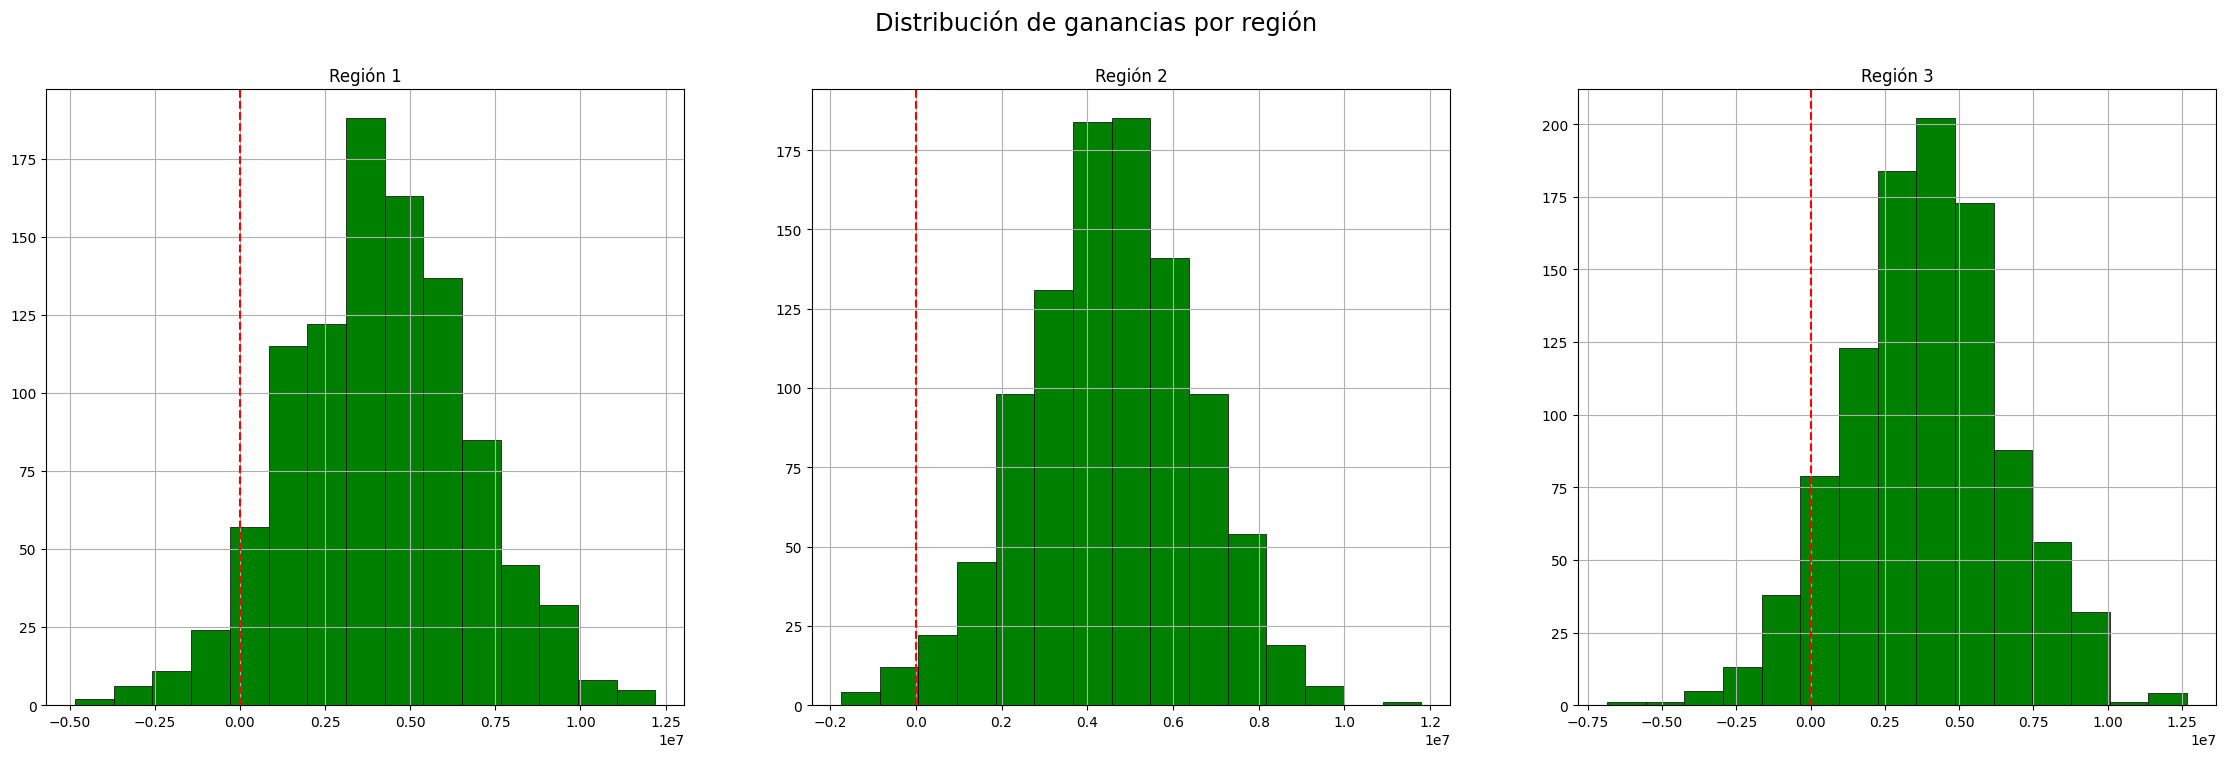

In [32]:
fig, axis = plt.subplots(ncols=3, nrows=1, figsize=(28, 8))
ax = axis.ravel()

revenues_1.hist(ax=ax[0], bins=15, color = 'green', edgecolor = 'black', linewidth = 0.5)
revenues_2.hist(ax=ax[1], bins=15, color = 'green', edgecolor = 'black', linewidth = 0.5)
revenues_3.hist(ax=ax[2], bins=15, color = 'green', edgecolor = 'black', linewidth = 0.5)


ax[0].set_title('Región 1')
ax[1].set_title('Región 2')
ax[2].set_title('Región 3')
# Colocamos una línea vertical en la posición 0
ax[0].axvline(x=0, color='r', ls='--')
ax[1].axvline(x=0, color='r', ls='--')
ax[2].axvline(x=0, color='r', ls='--')

plt.suptitle('Distribución de ganancias por región', size='xx-large')
plt.show()

El beneficio promedio mayor se encuentra en la región 2 con 4,5 millones de dolares en ganacias, seguido de la región 1 con una ganacia de 4,1 millones de dolares y por último la región 3 con una ganancia de 3,8. Además la región 2 tiene el porcentaje de riesgo de pérdida más pequeño de las diferentes regiones, con una porcentaje de 1,5%.

En las gráficas se puede observar como las regiones 1 y 3, tienden a tener mayor numero de submuestras con ganancias negativas, quiere decir que hay submuestras menores a cero, confirmando con nuestros resultados que tienen un mayor porcentaje de perdida.


# Conclusiones

**Preprocesamiento de datos**

1. Se observó que los datos de los tres datasets tenían en buena condición los datos, sin duplicaciones o valores nulos.

**Modelo de Regresión Lineal**

1. Para la construcción del modelo se tuvo solamente en cuenta las columnas de `f0`, `f1`, `f2` y `product`, ya que eran las únicas columnas que nos proporcionaban información relevante para el modelo.
2. Se dividieron los tres datasets en conjuntos de entrenamiento y validación en proporción 75:25, fijando como características las variables `f0`, `f1` y `f2`, y el objetivo la variable `product`.
3. Se estandarizaron las características para un mejor funcionamiento del modelo.
4. Se procedió a construir un modelo de regresión lineal para cada región, en donde se utilizó una función que nos permitió obtener el RECM, R2 y volumen promedio previsto de las tres regiones.
5. Se obtiene el mejor modelo de las tres regiones el cual fue para la REGIÓN 2, que presentó el error más bajo y el coeficiente de determinación más alto. Sin embargo, las regiones 1 y 3 presentaron el volumen promedio previsto más alto.

**Margen de beneficio y riesgo por región**

1. Tomando en cuenta las consideraciones que realiza OilyGiant para calcular el beneficio se pudo establecer que el volumen de producto necesario en cada pozo para no generar pérdidas es de 111.11 mil barriles y el costo de desarrollo de un pozo es de 500.000 dólares. Al comparar este valor con el volumen promedio de cada región con este volumen, se pudo establecer que ninguna región alcanza este volumen de producto, siendo el volumen promedio más alto de 95 mil barriles, el registrado en la tercera región.
2. Al desarrollar una función que calculó las ganancias por región en los 200 mejores pozos con el volumen previsto más alto, fue la región 1, la cual registró las ganancias más altas que ascienderon hasta los 33 millones de dólares. En el caso de las regiones 2 y 3 se obtuvieron ingresos inferiores a los 30 millones para ambas regiones.
3. Al calcular las ganancias a través de la técnica de bootstrapping para 1000 submuestras del objetivo de validación, con un tamaño de 500 y considerando solo los 200 mejores pozos de cada submuestra, se pudo establecer que la **REGIÓN 2** es la mejor región para el desarrollo de pozos ya que presentó el beneficio promedio más alto de 4.5 millones y el riesgo de pérdida más bajo de 1.5%. Si bien es una de las regiones con menor volumen de producto, es la que generará más ganancias y la que presentó el mejor modelo predictivo, además esta región presentó los mejores resultados al seguir la metodología de exploración y estudio de 500 puntos que sigue la compañía petrolera OilyGiant.
